## MODEL 2 - 🌿✨ Plant Type Detection using CNN – Model Summary
In this section, we built a Convolutional Neural Network (CNN) model to identify the type of plant from an image of its leaf. This is the first step in our complete plant disease detection pipeline – before we can detect diseases, we need to know what plant we’re dealing with! 🌱🧠

🧩 Model Goal:
Given an image of a leaf, classify it as one of the following:

🥔 Potato

🍅 Tomato

🫑 Bell Pepper

### ✅ Step 1: Importing Required Libraries

In [19]:
# Step 1: Import Libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np
import matplotlib.pyplot as plt
import os


### 📂 Step 2: Loading and Preprocessing the Data

In [20]:
# Step 2: Set Paths and Image Parameters
img_size = 128
batch_size = 32
data_dir = r"C:\Users\lenovo\Desktop\EU\sem 2\ML\Plant health\Model redefined\Notebook1_dataset"  # we have subfolders: Tomato/, Potato/, Bell_Pepper/

# Check the folders exist
assert all(os.path.isdir(os.path.join(data_dir, folder)) for folder in ["Tomato", "Potato", "Bell_Pepper"])


### 🔀 Step 3: Preprocessing

In [21]:
datagen = ImageDataGenerator(
    rescale=1./255,    #normalization
    validation_split=0.2
)

train_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',  #one hot encode into labels [0,1,0] fpr potato
    subset='training'
)

val_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

class_names = list(train_gen.class_indices.keys())
print("Class names:", class_names)


Found 17892 images belonging to 3 classes.
Found 4472 images belonging to 3 classes.
Class names: ['Bell_pepper', 'Potato', 'Tomato']


### 🧠 Step 4: Building the CNN Model

In [22]:
# Step 4: Build CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),  #gives feature map
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')  # 3 plant types
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',  #measures the loss by comparing the labels
              metrics=['accuracy'])  

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 14, 14, 128)      

## 🏋️ Step 5: Training the Model

In [23]:
# Step 5: Train Model and Save Best
checkpoint = ModelCheckpoint("best_plant_type_model.keras", save_best_only=True, monitor="val_accuracy", mode="max")

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=15,
    callbacks=[checkpoint]
)


Epoch 1/15


560/560 [==============================] - 382s 673ms/step - loss: 0.3620 - accuracy: 0.8657 - val_loss: 0.3386 - val_accuracy: 0.8875
Epoch 2/15
560/560 [==============================] - 130s 232ms/step - loss: 0.1909 - accuracy: 0.9283 - val_loss: 0.5685 - val_accuracy: 0.7399
Epoch 3/15
560/560 [==============================] - 133s 237ms/step - loss: 0.1338 - accuracy: 0.9499 - val_loss: 0.2226 - val_accuracy: 0.9193
Epoch 4/15
560/560 [==============================] - 329s 587ms/step - loss: 0.0931 - accuracy: 0.9661 - val_loss: 0.1554 - val_accuracy: 0.9463
Epoch 5/15
560/560 [==============================] - 283s 505ms/step - loss: 0.0720 - accuracy: 0.9740 - val_loss: 0.1730 - val_accuracy: 0.9298
Epoch 6/15
560/560 [==============================] - 248s 443ms/step - loss: 0.0476 - accuracy: 0.9826 - val_loss: 0.1836 - val_accuracy: 0.9367
Epoch 7/15
560/560 [==============================] - 256s 456ms/step - loss: 0.0410 - accuracy: 0.9861 - val_loss: 0.1453

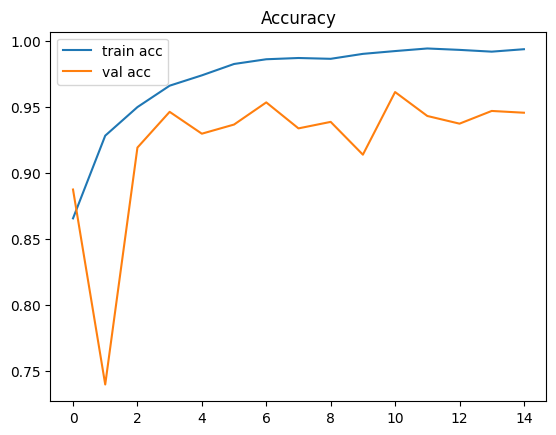

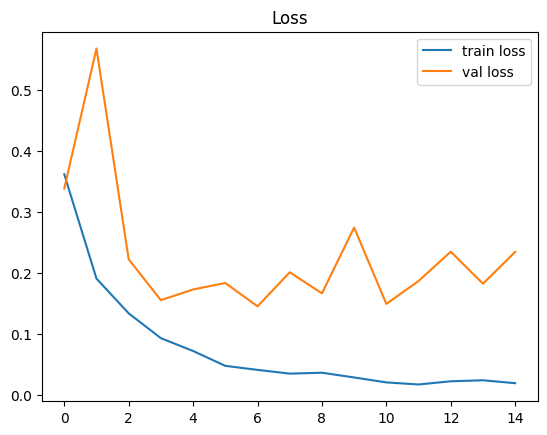

In [24]:
# Step 6: Plot Accuracy & Loss
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.title('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.legend()
plt.show()


In [25]:
from tensorflow.keras.preprocessing import image
import numpy as np

def predict_plant_type(img_path):
    img = image.load_img(img_path, target_size=(img_size, img_size))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    
    prediction = model.predict(img_array)
    predicted_class = class_names[np.argmax(prediction)]
    confidence = np.max(prediction)
    
    print(f"Predicted Plant Type: {predicted_class} ({confidence:.2f})")
    return predicted_class

# 🔍 Example usage with your image:
predict_plant_type(r"C:\Users\lenovo\Desktop\EU\sem 2\ML\Testing_img\potato.jpg")

1/1 [==============================] - 0s 332ms/step
Predicted Plant Type: Potato (0.96)


'Potato'

## 🌟 Final Model Performance Summary 🌟
Our CNN model for plant type detection (Potato, Tomato, Bell Pepper) achieved good performance.

Training Accuracy: Peaked at 99.74%

Validation Accuracy: Remained strong around 94–96%

Some increase in validation loss in later epochs hints at slight overfitting, but it did not significantly hurt accuracy.

The model is highly confident and consistent in distinguishing between different plant types using leaf images. 🍅🥔🫑